# Data Exploration
In this notebook we will provide an introduction to data exploration, which is a preliminary investigation of the data in order to better understand its specific characteristics.

Data exploration can aid in selecting the appropriate preprocessing and data analysis techniques. It can even address some of the questions typically answered by data mining.

For example, patterns can sometimes be found by visually inspecting the data. Also, some of the techniques used in data exploration can be used to understand and interpret data mining results.

Note that the topics covered in this notebook have considerable overlap with the area known as Exploratory Data Analysis (EDA). However, data mining views descriptive data analysis techniques as an end in themselves, whereas statistics, from which EDA originated, tends to view hypothesis-based testing as the final goal.

We will perform exploratory data analysis on the Titanic dataset to familiarize ourselves with the EDA process.

## Loading The Data

In [ ]:
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jpaNUBQ2ehkIB8nNP1XxyJjNtpCdvkTL' -O "data.zip"
!unzip -q "data.zip"

In [1]:
import numpy as np
import pandas as pd

The first step in exploratory analysis is reading in the data and then exploring the variables. It is important to get a sense of how many variables and cases there are, the data types of the variables, etc...

In [ ]:
df = pd.read_csv('C:/Users/sarea/Desktop/dm/datasets/avatar_student_dataset.csv')

In [3]:
df.columns

Index(['book', 'book_num', 'chapter', 'chapter_num', 'character', 'dialogue',
       'spoken_words', 'imdb_rating'],
      dtype='object')

<pre>
VARIABLE DESCRIPTIONS:
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
</pre>

It's a good idea to start off by checking the dimensions of your data set with df.shape and the variable data types of df.dtypes.

In [4]:
df.shape

(13385, 8)

In [5]:
df.dtypes

book             object
book_num          int64
chapter          object
chapter_num       int64
character        object
dialogue         object
spoken_words     object
imdb_rating     float64
dtype: object

In [6]:
df.head()

,book,book_num,chapter,chapter_num,character,dialogue,spoken_words,imdb_rating
0,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,8.1
1,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,8.1
2,NaN,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,8.1
3,Water,1,The Boy in the Iceberg,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,8.1
4,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!",8.1


In [7]:
df.index

RangeIndex(start=0, stop=13385, step=1)

It apperes that we have a monotonic integer index. However, that is not always the case, to demonstrate, consider the following series of characters with a non-monotonic integer index.

In [8]:
s = pd.Series(list("abcdef"), index=[49, 48, 47, 0, 1, 2])

In [9]:
s.head()

49    a
48    b
47    c
0     d
1     e
dtype: object

In [10]:
s.loc[0] # value at index label 0

'd'

In [11]:
s.iloc[0] # value at index location 0

'a'

In [12]:
s.loc[0:1]  # rows at index labels between 0 and 1 (inclusive)

0    d
1    e
dtype: object

In [13]:
s.iloc[0:1] # rows at index location between 0 and 1 (exclusive)

49    a
dtype: object

The main distinction between `loc` and `iloc`
* `loc` gets rows (and/or columns) with particular **labels**.
* `iloc` gets rows (and/or columns) at integer **locations** and always ranges from 0 to (length - 1)

In [14]:
try:
  s.drop(0).loc[0]
except KeyError:
  print("Element was not found!")

Element was not found!


In [15]:
s.drop(0).iloc[0]

'a'

In [16]:
s.drop(0)

49    a
48    b
47    c
1     e
2     f
dtype: object

Nonetheless, we can always get a monotonic index using `reset_index` method

In [17]:
s.reset_index().rename({0: 'values'}, axis=1)

,index,values
0,49,a
1,48,b
2,47,c
3,0,d
4,1,e
5,2,f


In [18]:
# s.reset_index(name='valuse')

In [19]:
s.reset_index().rename({0: 'values'}, axis=1).set_index('values').loc['a']

index    49
Name: a, dtype: int64

In [20]:
s.reset_index().rename({0: 'values'}, axis=1).loc[0:1, ['values', 'index']]

,values,index
0,a,49
1,b,48


In [117]:
s.reset_index().rename({0: 'values'}, axis=1).iloc[0:1][['values', 'index']]

,values,index
0,a,49


In [22]:
s.reset_index(drop=True) # To discard the old index if not needed

0    a
1    b
2    c
3    d
4    e
5    f
dtype: object

 Now we are going to calculate basic information about our dataset

In [8]:
df.isnull().sum()

book            1338
book_num           0
chapter            0
chapter_num        0
character        669
dialogue           0
spoken_words    3393
imdb_rating      161
dtype: int64

In [9]:
df.isnull()

,book,book_num,chapter,chapter_num,character,dialogue,spoken_words,imdb_rating
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
13380,False,False,False,False,False,False,False,False
13381,False,False,False,False,False,False,False,False
13382,False,False,False,False,False,False,False,False
13383,False,False,False,False,False,False,False,False


In [10]:
info_df = pd.DataFrame(df.dtypes)

# identifying the missing values from the dataset.
info_df['missing_val'] = df.isnull().sum()

info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100).round().astype(int)


# renaming the first column using rename()
info_df = info_df.rename(columns = {0:'data_type'})
info_df

,data_type,missing_val,missing_val_ratio
book,object,1338,10
book_num,int64,0,0
chapter,object,0,0
chapter_num,int64,0,0
character,object,669,5
dialogue,object,0,0
spoken_words,object,3393,25
imdb_rating,float64,161,1


It appears we have a mixture of numeric columns and columns with text data.

In data analysis, variables that split records into a fixed number of unique categories, such as Sex, are known as categorical variables or qualitative attributes. In contrast numeric variables are collectively referred
to as quantitative.

However, the properties of an attribute need not to be the same as the properties of the values used to measure it.
In other words, the values used to represent an attribute may have properties that are not properties of the attribute itself, and vice versa.

For example, in our dataset, ID and Age, while it is reasonable to
talk about the average age of a passenger, it makes no sense to talk about
the average passenger ID. Nonetheless, the only aspect of passengers that we want to capture with the ID attribute is that they are distinct.

As for the fare attribute, the properties of the integers used to represent fare are very much the properties of the attribute. Even so, the correspondence is not complete since, for example, fares have a maximum, while integers do not.

In [11]:
numeric = ['Age', 'Fare', 'SibSp', 'Parch']
ordinal = ['Pclass']
categorical = ['Sex', 'Cabin', 'Embarked', 'Ticket', 'Name']
target = 'Survived'

## Summary Statistics
One of the main purposes of EDA is to look at the data before assuming anything about it. This is important, so that the data scientist can validate any assumptions that might have been made in framing the problem or that are necessary for using certain algorithms.

**Summary statistics** are quantities, such as the mean and standard deviation,
that capture various characteristics of a potentially large set of values with a
single number or a small set of numbers. Everyday examples of summary
statistics are the average household income. Indeed, for many people,
summary statistics are the most visible manifestation of statistics.

### Univariate analysis
the simplest form of data analysis, where the data being analyzed consists of only one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.

For ordered data, it is useful to consider the percentiles of a set of
values. In particular, given an ordinal or continuous attribute $x$ and a number
$p$ between 0 and 100, the $p^{th}$ percentile $x_p$ is a value of $x$ such that $p\%$ of the observed values of $x$ are less than $x_p$. By tradition, $min(x) = x_{0\%}$ and $max(x) = x_{100\%}$.

Also, there is the most widely used summary statistics, the
**mean** and **median**, which are measures of the location of a set of values.<br>
Although the mean is sometimes interpreted as the middle of a set of values,
this is only correct if the values are distributed in a symmetric manner. If the
distribution of values is skewed, then the median is a better indicator of the
middle.

In [26]:
df[numeric].mean()

Age      29.699118
Fare     32.204208
SibSp     0.523008
Parch     0.381594
dtype: float64

In [27]:
df[numeric].median()

Age      28.0000
Fare     14.4542
SibSp     0.0000
Parch     0.0000
dtype: float64

To get the percentiles in pandas we can use `quantile(p)` to get the $p^{th}$ quantile, where `p` should be a fractional number.

In [28]:
df[numeric].quantile(0.1) # 10th percentile

Age      14.00
Fare      7.55
SibSp     0.00
Parch     0.00
Name: 0.1, dtype: float64

In [29]:
df[numeric].quantile(0.5) # same as median

Age      28.0000
Fare     14.4542
SibSp     0.0000
Parch     0.0000
Name: 0.5, dtype: float64

Another set of commonly used summary statistics for continuous data are those that measure the dispersion or spread of a set of values. Such measures
indicate if the attribute values are widely spread out or if they are relatively
concentrated around a single point such as the mean.

The simplest measure of spread is the range which is defined as
\begin{align}
range(x) = max(x) - min(x)
\end{align}

Although the range identifies the maximum spread, it can be misleading if
most of the values are concentrated in a narrow band of values, but there are
also a relatively small number of more extreme values. Hence, the variance
is preferred as a measure of spread. The standard deviation, which is the square root of the variance, is written as $s_x$ and has the same units as $x$.
\begin{align}
variance(x) = s_x^2 = \frac 1{m-1} \Sigma_1^m(\,x_i - \bar{x}\,)^2
\end{align}

In [30]:
df[numeric].max() - df[numeric].min()

Age       79.5800
Fare     512.3292
SibSp      8.0000
Parch      6.0000
dtype: float64

In [31]:
df[numeric].var()

Age       211.019125
Fare     2469.436846
SibSp       1.216043
Parch       0.649728
dtype: float64

In [32]:
df[numeric].std()

Age      14.526497
Fare     49.693429
SibSp     1.102743
Parch     0.806057
dtype: float64

We can use `descirbe` to calculate these statistics and summarize them in a formatted table.<br> The percentiles to include in the output default to [.25, .5, .75]

In [33]:
df[numeric].describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


Indeed, the variance is particularly
sensitive to outliers since it uses the squared difference between the mean
and other values. As a result, more robust estimates of the spread of a set
of values are often used:

*   Absolute Average Deviation (AAD)
*   Median Absolute Deviation (MAD)
*   Interquartile Range(IQR)

It's your play now, search for the formulas and try to apply them to our dataset.

In [34]:
########################
#####YOUR CODE HERE#####
########################

For unordered categorical values, there is not much that can be done
to further characterize the values except to compute the frequency with which
each value occurs for a particular set of data.

In [35]:
df[categorical].count()

Sex         891
Cabin       204
Embarked    889
Ticket      891
Name        891
dtype: int64

In [36]:
df[categorical].nunique()

Sex           2
Cabin       147
Embarked      3
Ticket      681
Name        891
dtype: int64

The mode of a set of values is the value that appears most often. It can be multiple values.

In [37]:
df[categorical].mode().head(1)

,Sex,Cabin,Embarked,Ticket,Name
0,male,B96 B98,S,1601,"Abbing, Mr. Anthony"


In [38]:
df[categorical].describe()

,Sex,Cabin,Embarked,Ticket,Name
count,891,204,889,891,891
unique,2,147,3,681,891
top,male,B96 B98,S,347082,"Braund, Mr. Owen Harris"
freq,577,4,644,7,1


**Pop Quiz!!** Why Not to Drop Name?! i.e treat it like passenger ID

### Multivariate analysis
Multivariate data analysis refers to any statistical technique used to analyze data that arises from more than one variable and it's main goal is to understand interactions between different variables in the data.

For continuous variables, the spread of the data is most commonly captured by the covariance matrix $S$, whose $ij\,^{th}$ entry $s_{ij}$ is the covariance of the $i\,^{th}$ and $j\,^{th}$ attributes of the data.
\begin{align}
covariance(x, y) = \frac 1{m-1} \Sigma_1^m(\,x_i - \bar{x}\,)\,(\,y_i - \bar{y}\,)
\end{align}
The covariance of two attributes is a measure of the degree to which two
attributes vary together and depends on the magnitudes of the variables.

We can use `cov` to compute the pairwise covariance of columns, excluding NA/null values.

In [39]:
df[numeric].cov()

,Age,Fare,SibSp,Parch
Age,211.019125,73.849030,-4.163334,-2.344191
Fare,73.849030,2469.436846,8.748734,8.661052
SibSp,-4.163334,8.748734,1.216043,0.368739
Parch,-2.344191,8.661052,0.368739,0.649728


A value near 0 indicates that two attributes do not have a (linear) relationship, but it is not possible to judge the degree of relationship between two variables by looking only at the value of the covariance.

Because the correlation of two attributes immediately gives an indication of how strongly two attributes are (linearly) related, correlation is preferred to covariance for data exploration.
\begin{align}
correlation(x, y) = \frac {covariance(x,y)}{s_xs_y}
\end{align}<br><br>
Similarly we can use `corr` to compute the pairwise corrlation.

In [40]:
df[numeric].corr()

,Age,Fare,SibSp,Parch
Age,1.000000,0.096067,-0.308247,-0.189119
Fare,0.096067,1.000000,0.159651,0.216225
SibSp,-0.308247,0.159651,1.000000,0.414838
Parch,-0.189119,0.216225,0.414838,1.000000


Let's investigate the relation between Survival and Passenger Class

In [41]:
df[['Age', 'Fare']][(df['Survived'] == 1) & (df['Pclass']==1)].describe()

,Age,Fare
count,122.000000,136.000000
mean,35.368197,95.608029
std,13.760017,85.286820
min,0.920000,25.929200
25%,24.250000,50.985450
50%,35.000000,77.958300
75%,45.000000,111.481225
max,80.000000,512.329200


In [42]:
df[['Age', 'Fare']][(df['Survived'] == 0) & (df['Pclass']==1)].describe()

,Age,Fare
count,64.000000,80.000000
mean,43.695312,64.684008
std,15.284243,60.662089
min,2.000000,0.000000
25%,31.000000,27.742700
50%,45.250000,44.750000
75%,55.250000,78.937500
max,71.000000,263.000000


In [43]:
df[['Age', 'Fare']][(df['Survived'] == 0) & (df['Pclass']==2)].describe()

,Age,Fare
count,90.000000,97.000000
mean,33.544444,19.412328
std,12.151581,15.307175
min,16.000000,0.000000
25%,25.000000,11.500000
50%,30.500000,13.000000
75%,39.000000,26.000000
max,70.000000,73.500000


In [44]:
df[['Age', 'Fare']][(df['Survived'] == 0) & (df['Pclass']==3)].describe()

,Age,Fare
count,270.000000,372.000000
mean,26.555556,13.669364
std,12.334882,12.118338
min,1.000000,0.000000
25%,19.000000,7.750000
50%,25.000000,8.050000
75%,33.000000,15.136450
max,74.000000,69.550000


We can easily see that in the lower class we have more young people died. As for the first class we can observe that with a higher ticket price you will have a higher probablity to survive.

Now it's your turn. Try to extract more information from the dataset in a similar manner.

In [45]:
########################
#####YOUR CODE HERE#####
########################

There are, of course, other types of summary statistics. For instance, the
skewness. However, they are beyond the scope of this notebook.<br>
You can do a small research about it and figure out how to handle them in pandas.

In [46]:
########################
#####YOUR CODE HERE#####
########################

## Preprocessing
Before any further investigation and to avoid the risk of committing serious data analysis blunders we must address some of the problems in the Titanc dataset.

### Imputation
Detecting missing values is the easy part, it is far more difficult to decide how to handle them. In cases where you have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. On the other hand, if you have more than a handful of missing values, removing records with missing values could cause you to get rid of a lot of data.

Missing values in categorical data are not particularly troubling because you can simply treat NA as an additional category. While in numeric variables they are more troublesome, since you can't just treat a missing value as number. As it happens, the Titanic dataset has some NA's in the Age variable (numeric), And also it has too many missing values for the Cabin attribute (categorical).

In [10]:
info_df

,data_type,missing_val,missing_val_ratio
PassengerId,int64,0,0
Survived,int64,0,0
Pclass,int64,0,0
Name,object,0,0
Sex,object,0,0
Age,float64,177,20
SibSp,int64,0,0
Parch,int64,0,0
Ticket,object,0,0
Fare,float64,0,0


In [21]:
processed_df = df.copy()
processed_df.dropna(subset=['Embarked'], inplace=True)

In [20]:
processed_df['Embarked'].isnull().sum()

0

Quiz. So, We have 177 Null values in Age.. How could you make use of the Names to interpolate the absence of the Null values?

In [22]:
processed_df['Name'][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [27]:
# Split the titles from the passenger names which is itself a feature
# but also help in calculating missing median age values
processed_df['surname'] = processed_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
processed_df['surname'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: surname, dtype: object

In [28]:
processed_df['surname'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [24]:
titles = processed_df['surname'].unique()

In [25]:
len(titles)

17

In [ ]:
processed_df['Age'].fillna(-1, inplace=True)

mask = processed_df['Age'] != -1
surname = processed_df['surname']

medians = {title: processed_df['Age'][(mask) & (surname == title)].median() for title in titles}

other_df = processed_df.copy()
other_df['Age'] = surname.map(medians)

processed_df = processed_df.where(mask, other_df) # Replace values where the condition is False from other.
processed_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [34]:
processed_df['Age'].isna().any()

False

It is common knowledge that we can achieve results in more than one way. Try to leverage `groupby` method and fill the missing values rather than using the previous implementation.

In [55]:
###################
#####YOUR CODE#####
###################

So now we have eliminated all of the null values in Age variable and we can safely drop the name attribute as there is no more useful information to extract from it.

In [40]:
processed_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [43]:
processed_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [44]:
processed_df.fillna('unknown', inplace=True)

Note that scikit-learn provides many strategies for imputing missing values in the preprocessing module.<br>
You can check them out in the package [documentation.](https://scikit-learn.org/stable/modules/impute.html)

### Discretization and Binarization
Some data mining algorithms, especially certain classification algorithms, require that the data be in the form of categorical attributes. Thus, it is often necessary to transform a continuous attribute into a categorical attribute (discretization), and both continuous and discrete attributes may need to be transformed into one or more binary attributes (binarization).

Additionally, if a categorical attribute has a large number of values (categories), or some values occur infrequently, then it may be beneficial for certain data mining tasks to reduce the number of categories by combining some of the values.

In [45]:
char_cabin = processed_df["Cabin"].astype(str) # Convert data to str

new_cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_cabin = pd.Categorical(new_cabin)

new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016873
B,45,0.050619
C,59,0.066367
D,33,0.037120
E,32,0.035996
F,13,0.014623
G,4,0.004499
T,1,0.001125
u,687,0.772778


In [46]:
processed_df['Cabin'] = new_cabin

In [62]:
from sklearn.preprocessing import KBinsDiscretizer
transformer = KBinsDiscretizer(n_bins=5, encode='ordinal')
discrete_age = transformer.fit_transform(processed_df['Age'].values.reshape(-1, 1))

In [63]:
np.unique(discrete_age)

array([0., 1., 2., 3., 4.])

In [64]:
transformer.bin_edges_[0]

array([ 0.42, 20.  , 26.  , 30.  , 38.  , 80.  ])

The edges of each bin:
*   $[0.42, 20)$
*   $[20, 26)$
*   $[26, 30)$
*   $[30, 38)$
*   $[38, 80)$


**KBinsDiscretizer** implements different binning strategies, which can be selected with the strategy parameter. The ‘uniform’ strategy uses constant-width bins. The ‘quantile’ strategy (default) uses the quantiles values to have equally populated bins in each feature. The ‘kmeans’ strategy defines bins based on a k-means clustering procedure performed on each feature independently.

Try the different strategies and compare the outputs intuitively.

| Strategy | Idea                         | Distribution                     | When to Use?                                                            |
|----------|------------------------------|----------------------------------|-------------------------------------------------------------------------|
| Uniform  | Fixed-width binning          | Uneven in values                 | When the data is uniformly distributed                                 |
| Quantile | Binning by percentiles       | Each bin has roughly same count | When you want to balance the distribution across bins                  |
| K-means  | Smart clustering-based binning | Close to natural groupings       | When the data has clear clusters or contains outliers                  |


In [64]:
########################
#####YOUR CODE HERE#####
########################

Be aware that one can specify custom bins by passing a callable defining the discretization strategy to FunctionTransformer. For instance, we can use the Pandas function `cut`

In [ ]:
from sklearn.preprocessing import FunctionTransformer

bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = FunctionTransformer(pd.cut, kw_args={'bins': bins,
                                                   'labels': labels,
                                                   'retbins': False})
age_categories = transformer.fit_transform(processed_df['Age'])

In [66]:
pd.Categorical(age_categories).describe()

,counts,freqs
categories,,
infant,14,0.015748
kid,61,0.068616
teen,108,0.121485
adult,685,0.770529
senior citizen,21,0.023622


In [67]:
processed_df['age_category'] = age_categories

The **Binarizer** class in sklearn implements binarization in a very intuitive way. The only parameters you need to specify are the threshold and copy. All values below or equal to the threshold are replaced by 0, above it by 1. If copy is set to False, inplace binarization is performed, otherwise a copy is made.

In [68]:
from sklearn.preprocessing import Binarizer
transformer = Binarizer(threshold=20)
fare = transformer.fit_transform(processed_df['Fare'].values.reshape(-1, 1))

In [69]:
pd.Categorical(pd.Series(fare.flatten(), dtype=int).map({1: 'High', 0: 'Low'})).describe()

,counts,freqs
categories,,
High,374,0.420697
Low,515,0.579303


Note that the **Binarizer** is similar to the **KBinsDiscretizer** when `k = 2`, and when the bin edge is at the value `threshold`.

In [70]:
processed_df['Family'] = processed_df['SibSp'] + processed_df['Parch']

### Sampling

One of the biggest hurdles faced in data analytics is dealing with massive amounts of data. Where it would be impractical and sometimes impossible to study the whole population. So how do we overcome this problem? Is there a way that you can pick a subset of the data that represents the entire dataset? As it turns out, there is!

We define Sampling as the practice of selecting an individual group from a population to study the whole population. However, this process is not as simple as it sounds. Whenever you follow this method, your sample size has to be **ideal** - it should **NOT** be too *large* or too *small*, it has to be a true representation of the population.

#### Iris Feature by Class Distribution in Random Subsampling

The following code will randomly divide the iris dataset into a 100-example training and 50-example test dataset to illustrate the issues that occur in naïve subsampling. I.e., the proportion of class labels in the training set will differ from the original dataset. Even worse, the proportion of class labels in the test set will be different too, depending on what the class label proportion is in the training set.

In [72]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 163.8 kB/s eta 0:00:09
   - -------------------------------------- 0.0/1.4 MB 164.3 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.4 MB 164.3 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.4 MB 218.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 218.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 228.2 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 228.2 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.4 MB 226.0 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.4 MB 226.0 kB/s eta 0:00:06
   --- ---------------

In [73]:
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = iris_data()

X, y = shuffle_arrays_unison([X, y], random_seed=123)
X_train, X_test = X[:100], X[100:150]
y_train, y_test = y[:100], y[100:150]

In [74]:
np.bincount(y), np.bincount(y_train), np.bincount(y_test)

(array([50, 50, 50], dtype=int64),
 array([38, 28, 34], dtype=int64),
 array([12, 22, 16], dtype=int64))

In [75]:
iris_df = pd.DataFrame(X)
iris_df['class'] = y

df_train = pd.DataFrame(X_train)
df_train['class'] = y_train

df_test = pd.DataFrame(X_test)
df_test['class'] = y_test

In [77]:
iris_df

,0,1,2,3,class
0,6.3,2.5,4.9,1.5,1
1,6.8,3.0,5.5,2.1,2
2,6.4,2.8,5.6,2.2,2
3,5.6,3.0,4.1,1.3,1
4,4.9,3.1,1.5,0.1,0
...,...,...,...,...,...
145,5.1,3.5,1.4,0.3,0
146,5.1,2.5,3.0,1.1,1
147,5.6,3.0,4.5,1.5,1
148,6.2,2.8,4.8,1.8,2


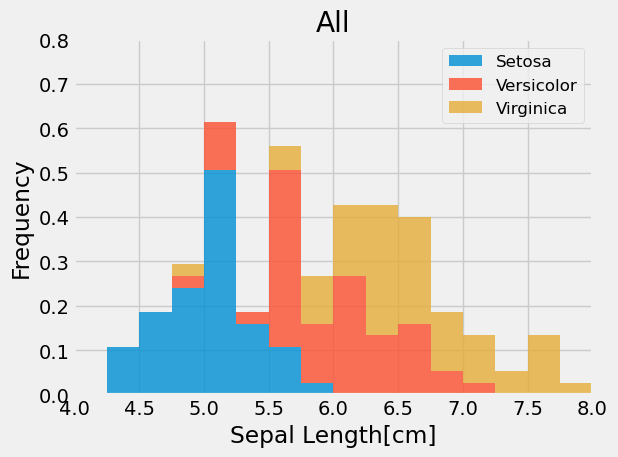

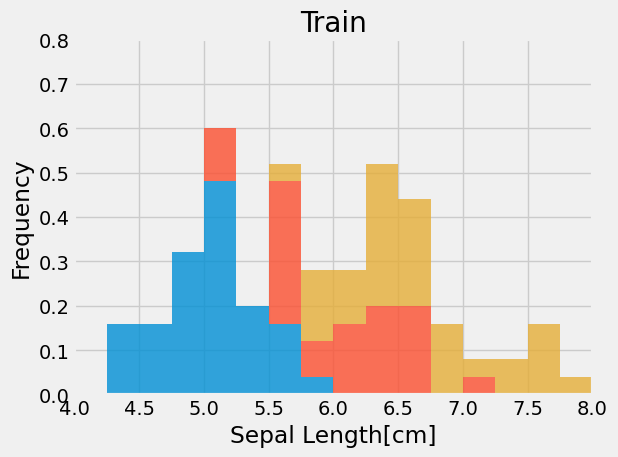

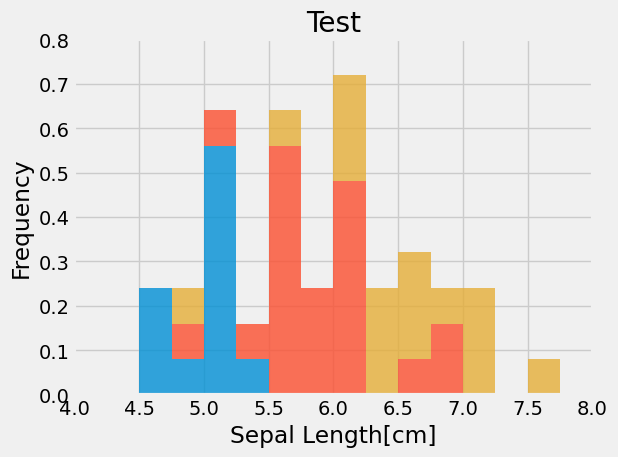

In [82]:
def stackhist(x, y, **kws):
    grouped = x.groupby(y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data,
             histtype="barstacked",
             label=labels,
             alpha=0.8,
             density=True,
             bins=np.arange(4.0, 8.1, 0.25))
    plt.ylim([0, 0.8])
    plt.xlim([4, 8])
    plt.xlabel('Sepal Length[cm]')
    plt.ylabel('Frequency')


with plt.style.context('fivethirtyeight'):

    stackhist(iris_df[0], iris_df['class'])
    plt.legend(['Setosa', 'Versicolor', 'Virginica'], fontsize=12)
    plt.title('All')
    plt.tight_layout()
    #plt.savefig('./all.svg')
    plt.show()

    stackhist(df_train[0], df_train['class'])
    plt.title('Train')
    plt.tight_layout()
    #plt.savefig('./train.svg')
    plt.show()

    stackhist(df_test[0], df_test['class'])
    plt.title('Test')
    plt.tight_layout()
    #plt.savefig('./test.svg')
    plt.show()

#### Stratified Sampling

There are many sampling techniques, however, we are interested in **Stratified Sampling**. In this sampling technique we subdivide the population into subgroups, called strata, based on some characteristics (age, gender, income, etc.), but most of the time based on the our *target* variable. Then we use random sampling to select a sample for each subgroup. This method allows you to draw more precise conclusions because it ensures that every subgroup is properly represented. Indeed, such technique can be used to *balance* our dataset!

In [83]:
df[target].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [90]:
sampled_df = df.groupby(target, group_keys=False).apply(lambda x: x.sample(300, random_state=42))

The sample size is bounded by the size of the smallest subgroup.

In [94]:
sampled_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S


In [95]:
sampled_df.shape

(600, 12)

In [96]:
sampled_df[target].value_counts()

0    300
1    300
Name: Survived, dtype: int64

In [97]:
df.groupby([target, 'Pclass'], group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42)).shape # Take 80% from each subgroup i.e. 80% of the whole data but in stratified fashion!

(714, 12)

Note that these problems can be mitigated by using the stratify parameter in scikit-learn's `train_test_split` function.

### Transformations
A variable transformation refers to a transformation that is applied to all
the values of a variable. In other words, for each object (sample), the transformation is applied to the value of the variable for that object.

In general we have two type of transformation:

1.   Standarization
2.   Simple Function Transformation

Variable transformations should be applied with caution since they change
the nature of the data. While this is what is desired, there can be problems
if the nature of the transformation is not fully appreciated. For instance, the
transformation $\frac1x$ reduces the magnitude of values that are 1 or larger, but increases the magnitude of values between 0 and 1.

To help clarify the effect of a transformation, it is important to ask questions such as the following:
1. Does the order need to be maintained?
2. Does the transformation apply to all values, especially negative values and 0?
3. What is the effect of the transformation on the values between 0 and 1?

#### Standardization or Z-Score Normalization
The goal of standardization or normalization is to make an entire
set of values have a particular property. A traditional example is that
of “standardizing a variable” in statistics i.e. creates a new variable that has a mean of 0 and a standard deviation of 1.

\begin{align}
\grave x = \frac {(\,x - \bar x\,)}{s_x}
\end{align}

If different variables are to be combined in some way, then such a transformation is often necessary to avoid having a variable with large values dominate the results of the calculation.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_fare = scaler.fit_transform(processed_df['Fare'].values.reshape(-1, 1))

In [99]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(pd.Series(scaled_fare.flatten()).describe())

count   889.00
mean      0.00
std       1.00
min      -0.65
25%      -0.49
50%      -0.36
75%      -0.02
max       9.67
dtype: float64


#### Normalization or Min-Max Scaling
Normalization is used to transform features to be on a similar scale. This scales the range to [0, 1] or sometimes [-1, 1]. Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with them.
\begin{align}
\grave x = \frac {(\,x - x_{min}\,)}{x_{max} - x_{min}}
\end{align}

Usually, we would scale variables like age and not incomes because only a few people have high incomes but the age is close to uniform.

**Note** that in the data mining community the terms (Standarization, Normalization) are often used interchangeably.

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_age = scaler.fit_transform(processed_df['Age'].values.reshape(-1, 1))

In [101]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(pd.Series(scaled_age.flatten()).describe())

count   889.00
mean      0.36
std       0.17
min       0.00
25%       0.26
50%       0.37
75%       0.43
max       1.00
dtype: float64


#### Function Transformation
For this type of variable transformation, a simple function is
applied to each value individually.
\begin{align}
\grave x = f\,(x)
\end{align}

In pandas we can easily apply our transformation using `apply`, `map` and `applymap` methods.<br>
You can refer to the *accepted* answer in [this](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas) Stack Overflow discussion to get a detailed explanation for the difference between `apply`, `map` and `applymap` methods in pandas.<br>
Try to experiment with different functions and chain multiple transformations.

In [ ]:
###################
#####YOUR CODE#####
###################

### Pipes!
In Data Processing, it is often necessary to write a function to perform operations (such as statistical calculations, splitting, or substituting value) on a certain row or column to obtain new data.

Instead of writing
```
# f(), g(), and h() are user-defined function
# df is a Pandas DataFrame
f(g(h(df), arg1=a), arg2=b, arg3=c)
```
One can write
```
(df.pipe(h)
   .pipe(g, arg1=a)
   .pipe(f, arg2=b, arg3=c))
```

In [104]:
def load_data():
  return df

def substitute_sex(x_df):
    mapping={'male':'M','female':'F'}
    x_df['Sex'] = x_df['Sex'].map(mapping)
    return x_df

In [105]:
(load_data()
      .pipe(substitute_sex)
      .pipe(lambda x_df, dummy_arg: x_df, dummy_arg='Dummy')
      ).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S


As [Ronald Coase](https://en.wikipedia.org/wiki/Ronald_Coase) says
> “If you torture the data long enough, it will confess to anything.”

Statistics can be manipulated to support any conclusion. While data tell a story, we could always get any conclusion we want if we torture data enough. Here, by torturing, it could refer to anything — Removing data, selecting specific methods, data inclusion, etc.<br>Hence, you must not overwork in the pre-processing step and accept that data can be bad. In fact, in most cases it is!!

## Visualization
Visual techniques can play a key role in data analysis. In fact, sometimes the
use of visualization techniques in data mining is referred to as **visual data
mining**. The overriding motivation for using visualization is that people can quickly absorb large amounts of visual information and find patterns in it.

Another general motivation for visualization is to make use of the domain
knowledge. That is to say, an expert can often quickly eliminate many uninteresting patterns and direct the focus to the patterns that are important.

### What is Plotly
Plotly allows one to create *interactive* charts with APIs in Python, R, and JavaScript. It's intuitive, highly customisable and from version 4, it integrates nicely with Pandas DataFrames leveraging the Plotly Express module which was included in Plotly version 4, from being its own module.

In [ ]:
!pip -q install plotly

In [106]:
layout_options = {
    'paper_bgcolor':"#383838",
    'plot_bgcolor':'#383838',
    'title_font': dict(color='white'),
    'legend_font': dict(color='white'),
    'yaxis':dict(color="white"),
    'xaxis':dict(color="white")
    }

In [110]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2], width=600, height=400)
fig.update_layout(**layout_options) # unpacking arguments using ** operator
fig.show()

### Plotly Magic
Now we can continue in our exploration adventure...

In [111]:
res = processed_df['Embarked'].value_counts()
fig = px.bar(x=res.index, y=res.values, width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [112]:
plot_data = processed_df[['Sex',
                          'Survived',
                          'Age']].groupby(['Sex', 'Survived']).count()
plot_data

Age
Sex    Survived     
female 0          81
       1         231
male   0         468
       1         109

In [113]:
plot_data.rename(columns = {'Age':'count'}, inplace=True)

In [114]:
plot_data.loc['male']['count']

Survived
0    468
1    109
Name: count, dtype: int64

In [115]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=plot_data.loc['male'].index, y=plot_data.loc['male']['count'],
           name='Male'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=plot_data.loc['female'].index, y=plot_data.loc['female']['count'],
    name='Female'),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Survival vs Sex",
                  **layout_options)
# refer to the link https://community.plotly.com/t/fig-update-layout-only-affecting-first-subplot/29648
fig.update_yaxes(layout_options['yaxis'])
fig.update_xaxes(layout_options['xaxis'])
fig.show()

In [116]:
fig = px.histogram(processed_df, x="Pclass", y="Survived",
             color='Sex', barmode='group',
             histfunc='count',
             width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [117]:
fig = px.histogram(processed_df, x="Pclass", y="Survived",
             color='Sex', barmode='group',
             histfunc='sum',
             width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [118]:
# Alternative implementation of histogram
# Using this implementation you can apply any histfunc i.e. not bound to ploty defined functions (avg, sum, min, max, count) you can use, for instance, median!
grouped = processed_df.groupby(['Pclass', 'Sex'], as_index=False).sum(numeric_only=True).rename({'Survived': 'Count'}, axis=1)

fig = px.bar(grouped.iloc[::-1], x='Pclass', y='Count', color='Sex',
             barmode='group',
             width=600, height=400)
fig.update_layout(**layout_options)
fig.update_layout()
fig.show()

In [119]:
fig = px.box(processed_df, y='Age', x='Pclass', width=600, height=400) # Percentiles visualization!
fig.update_layout(**layout_options)
fig.show()

Notice how the plot detected outliers i.e. elders in each class in the 4th percentile

In [120]:
fig = px.histogram(processed_df, x="Age", color='Sex', nbins=17, marginal="box",
                   width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [121]:
import plotly.figure_factory as ff

# group_lables = processed_df['age_category'].unique()
group_lables = ['teen', 'adult']
hist_data = [processed_df[processed_df['age_category'] == category]['Age'].to_numpy() for category in group_lables]
fig = ff.create_distplot(hist_data, group_lables, bin_size=2)

# distplots are the same as histograms with probability density normalization
# fig = px.histogram(processed_df[processed_df['age_category'].isin(group_lables)],
#                    x="Age", color='age_category', marginal="rug",
#                    histnorm='probability density',
#                    width=600, height=400)
fig.update_layout(width=800, height=400, **layout_options)
fig.show()

In [122]:
fig = px.scatter(processed_df, y='Age', x='Fare',
                 color=processed_df['Survived'].map({1: 'Survived',
                                                     0: 'Died'}),
                 # color_discrete_sequence=['rgb(255, 127, 14)', 'rgb(31, 119, 180)'],
                 # symbol='Pclass'
                 )
fig.update_layout(**layout_options)
fig.show()

Notice how the density is decreasing from left to right!.

We observe the pattern of survival, considering the density distribution, we have more survived objects with the increase of fare. Again, supporting our previous assumption of correlation.

In [123]:
grouped = processed_df.groupby(['Pclass', 'Sex'], as_index=False).count().rename({'Age': 'Count'},
                                                                          axis=1)

In [124]:
fig = px.sunburst(grouped, path=['Pclass', 'Sex'], values='Count',
                  width=600, height=600)
fig.update_traces(textinfo='label+percent entry',
                  textfont=dict(color='white'),
                  rotation=120)
fig.update_layout(**layout_options)
fig.update_layout()
fig.show()

It's up to you now. Try different types of plots e.g. Pie Chart, Line Plot and HeatMap using [Plotly Express](https://plotly.com/python-api-reference/plotly.express.html).

Note that pandas come with an embedded visualization framework leveraging matplotlib in it's core.<br>
You can refer to pandas [documentation](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) for more details.

In [ ]:
########################
#####YOUR CODE HERE#####
########################

## Predictive Power Score (PPS)
Let’s take a moment and revisit correlation. First, correlation is only defined for numeric variables. Second, the score ranges from -1 to 1 and indicates if there is a strong *linear* relationship. Nonetheless, there are many non-linear relationships that the score simply won’t detect.<br>

<AxesSubplot:>

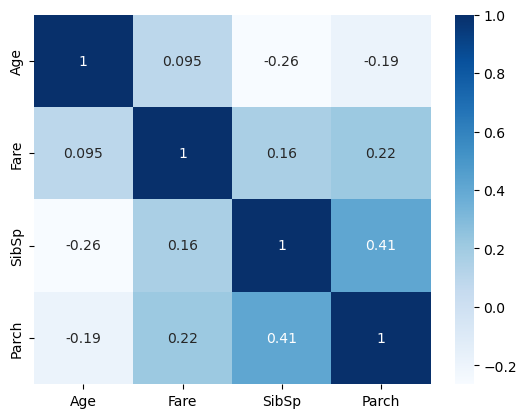

In [125]:
import seaborn as sns
sns.heatmap(processed_df[numeric].corr(), cmap="Blues", annot=True)

Notice the symmetry in the corrleation matrix. Symmetry means that the correlation is the same whether you calculate the correlation of A and B or the correlation of B and A.

However, relationships in the real world are rarely symmetric. More often, relationships are asymmetric.
For instance a variable with 3 unique values will never be able to perfectly predict another variable with 100 unique values. But the opposite might be true.

From the previous disccussion we can say that we need an asymmetric, data-type-agnostic score for predictive relationships between two variables that ranges from 0 to 1. Thus, we will introduce **PPS**.

In [73]:
!pip -q install --no-deps ppscore

In [126]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [127]:
import ppscore as pps
# if you face a contextualversionconflict just restart the runtime and try again

**Single Predictive Power Score**
*   Answering the question: how well can Sex predict the Survival probability?

In [128]:
pps.score(processed_df, "Sex", "Survived")

{'x': 'Sex',
 'y': 'Survived',
 'ppscore': 0.12664237674349743,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.38245219347581555,
 'model_score': 0.33401753870327433,
 'model': DecisionTreeRegressor()}

**PPS matrix**
*   Answering the question: which predictive patterns exist between the columns?


Text(50.72222222222221, 0.5, 'target')

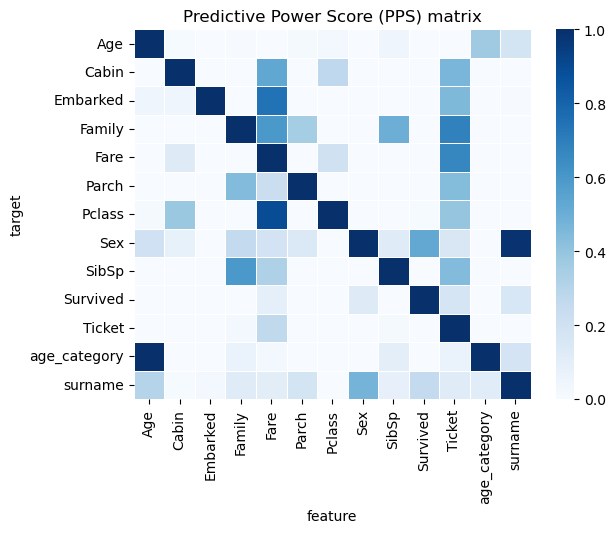

In [129]:
mat = pps.matrix(processed_df)
mat = mat[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
ax = sns.heatmap(mat, vmin=0, vmax=1, cmap="Blues", linewidths=0.5)
ax.set_title("Predictive Power Score (PPS) matrix")
ax.set_xlabel("feature")
ax.set_ylabel("target")

The seventh row of the matrix tells you that the best univariate predictor of the variable Sex is the variable surname. This makes sense because if we know the title we can easily reflect it to Sex. However, the opposite is more difficult to deduce becuase the Age attribute will play a role.

You can check this [article](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598) for more details about PPS

**Pop Quiz!** Should correlated features be removed?

## Hypothesis Testing
Hypothesis testing is an essential part in inferential statistics where we use observed data in a sample to draw conclusions about unobserved data — often the population. Although there are hundreds of statistical hypothesis tests that you could use, there is only a small subset that you may need to use in a data mining project.<br><br>
Hypothesis tests involves a baseline assumption that the groups are equivalent, and any difference between them is due to chance. This baseline assumption is termed the null hypothesis. Our hope, then, is that we can in fact prove the null hypothesis wrong and show that the outcomes
for groups A and B are more different than what chance might produce.

### Normality Tests
A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution. If methods are used that assume a Gaussian distribution, and your data was drawn from a different distribution, the findings may be misleading or plain wrong.<br>
We will look at two common tests to check whether a data sample has a Gaussian distribution. i.e we set the null hypothesis $H_0$ that the data follow a normal distribution.

*   Shapiro-Wilk Test
*   Anderson-Darling Test



In [130]:
np.random.seed(5)
data = np.random.normal(0, 1, 30)
laplace_data = np.random.laplace(0, 1, 30)

In [131]:
from scipy.stats import shapiro
stat, p = shapiro(data) #  test score, p_value
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.963, p=0.367
Probably Gaussian


The `p_value` tells you how likely it is that your data could have occurred under the null hypothesis.

**Extra Marks!!** Why we are using 0.05 as our threshold? and why it is so common?.

(Hint: search for `Alpha Level` or `Significance Level`)

In [80]:
from scipy.stats import normaltest

stat, p = normaltest(laplace_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=6.735, p=0.034
Probably not Gaussian


### Correlation Tests
We discussed earlier standard correlation coefficient, also known as pearson correlation coefficient, and PPS. In fact, we can formulate the problem as a hypothesis test i.e. we set the null hypothesis $H_0$ that the samples are independent, and use [scipy](https://scipy.github.io/devdocs/index.html) module implementation.

*  Pearson Correlation Coefficient
*  Spearman’s Rank Correlation
*  Chi-Squared $\chi^{2}$ Test

Note that Chi-Squared test is only valid for categorical data and uses contingency tables, whereas Pearson Coefficient and Spearman’s Rank are only valid for numeric data

In [81]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


In [82]:
stat, p = pearsonr(np.random.normal(0, 1, 10), np.random.normal(0, 1, 10))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.142, p=0.695
Probably independent


In [83]:
from scipy.stats import spearmanr
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


We can use pandas `crosstab` function to calcluate contingency table

In [84]:
table = pd.crosstab(processed_df['Embarked'], processed_df['Cabin'])
table.head()

Cabin,A,B,C,D,E,F,G,T,u
Embarked,,,,,,,,,
C,7,22,21,13,5,1,0,0,99
Q,0,0,2,0,1,1,0,0,73
S,8,23,36,20,26,11,4,1,515


In the contingency table $T$, the $ij\,^{th}$ entry $t_{ij}$ is the number of times the $i\,^{th}$ and $j\,^{th}$ attributes of the data have come together in the same object, for example, in our dataset, we have 7 objects embarked at `C` and were setting in cabin `A`.

In [85]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table)

# dof = degree_of_freedom = (number_of_rows - 1) * (number_of_columns - 1)
# degree of freedom indicate of how much the variables can change witheach other
# think of it like the dof of a robotic arm, where it increase with the number of joints!
# and it indicate region the arm can reach.

print('stat=%.3f, p=%.3f, dof=%d' % (stat, p, dof))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=74.496, p=0.000, dof=16
Probably dependent


**Extra Marks!!** How can we calculate the degree of corrleation using  $\chi^{2}$ value?
<br><br>
For each degree of freedom, $\chi^{2}$ test will have different value under a specific `p_value` i.e. if we are using $\chi^{2}$ value to conclude the test rather than `p_value` directly then we must check dof before our judgment. We can get such values using the inverse of chi square cumulative distribution function

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1zzsxOnRIusGux76T2Z-I1xTfzDUzu8EH' />
<figcaption>The table above gives a number of p-values matching to
$\chi^{2}$ for the first 10 degrees of freedom.</figcaption></center>
</figure>

In [86]:
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f, dof=%d' % (stat, p, dof))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873, dof=2
Probably independent


Looking at the above table, then for second degree of freedom and 0.05 alpha level, $\chi^{2}$ value must be larger than 5.99 in order to reject the null hypothesis (variables independence), and in our case it is **NOT**, hence, there is no enough statistical evidence to indicate corrleation!. Also, notice the high `p_value` which agrees with the previous discussion.

### Parametric Statistical Hypothesis Tests
Parametric tests are those tests for which we have prior knowledge of the population distribution e.g. Gaussian.

In applied machine learning, we need to compare data samples, specifically the mean of the samples. Perhaps to see if one technique performs better than another on one or more datasets. To quantify this question, the most commonly used tests are:


1.   T-test when the sample size is small i.e less than 30
2.   Z-test when sample size is large
3.   Anova-test, also referred to as analysis of variance, when we have two or more samples.

You can check [this](https://www.analyticsvidhya.com/blog/2021/06/hypothesis-testing-parametric-and-non-parametric-tests-in-statistics) article for more details.




In [87]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(np.random.normal(0, 1, 30), np.random.normal(0, 1, 30))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.932, p=0.355
Probably the same distribution


In [88]:
stat, p = ttest_ind(np.random.normal(0, 1, 30), np.random.binomial(1, 0.5, 30))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.097, p=0.277
Probably the same distribution


In [89]:
from scipy.stats import f_oneway
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 50
data3 = 5 * np.random.randn(100) + 52
stat, p = f_oneway(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p >  0.05:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=7.424, p=0.001
Different distributions (reject H0)


## Anomaly Detection
In anomaly detection, the goal is to find objects that are different from most
other objects. Often, anomalous objects are known as outliers, since, on a
scatter plot of the data, they lie far away from other data points.
There are a variety of anomaly detection approaches from several areas,
including statistics, machine learning, and data mining.

Here, we provide a high-level description of some anomaly detection techniques
and their associated definitions of an anomaly and introduce [PyOD](https://pyod.readthedocs.io/en/latest/) which is the most comprehensive and scalable Python toolkit for detecting anomalous objects in multivariate data.

In [90]:
!pip -q install pyod

In [91]:
from pyod.utils.data import evaluate_print, generate_data

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features=2,
    contamination=contamination,
    behaviour="new",
    random_state=42,
)

### Model-Based Techniques
Many anomaly detection techniques first build a model of the data. Anomalies are objects that do not fit the model very well.

For example, a model of the distribution of the data can be created by using
the data to estimate the parameters of a probability distribution. An object
does not fit the model very well; i.e., it is an anomaly, if it is not very likely under the distribution.<br><br>
**Outlier Detection with Kernel Density Functions**
Kernel Density Estimation (KDE) is an unsupervised learning technique that helps to estimate the PDF of a random variable in a non-parametric way. It’s related to a histogram but with a data smoothing technique.

In PyOD package they used a modified version of the algorithm, you can refer to [this](https://cis.temple.edu/~latecki/Papers/mldm07.pdf) paper for more details.

In [92]:
from pyod.models.kde import KDE

clf = KDE()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print('KDE', y_train, y_train_scores)


On Training Data:
KDE ROC:0.9992, precision @ rank n:0.95


In [93]:
print("\nOn Test Data:")
evaluate_print('KDE', y_test, y_test_scores)


On Test Data:
KDE ROC:1.0, precision @ rank n:1.0


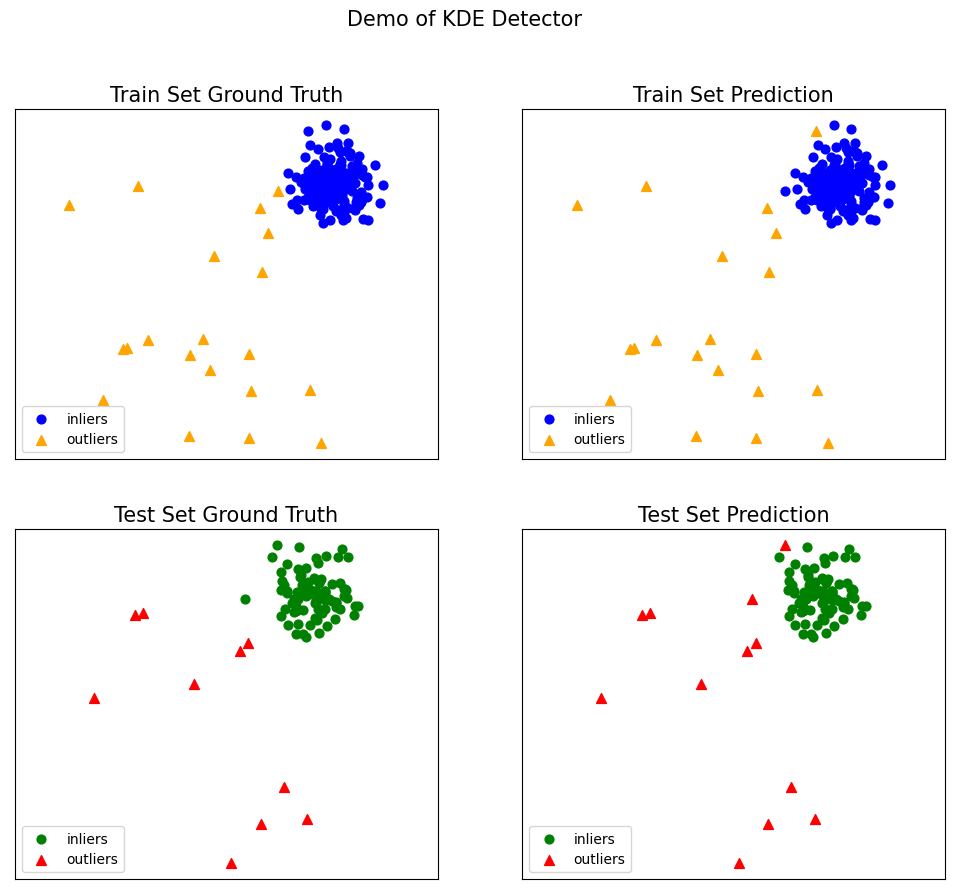

In [94]:
from pyod.utils.example import visualize
# visualize the results
visualize(
    'KDE',
    X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
)

### Proximity-Based Techniques
It is often possible to define a proximity measure between objects, and a number of anomaly detection approaches are based on proximities. Anomalous objects are those that are distant from most of the other objects. Many of the techniques in this area are based on distances and are referred to as distance-based outlier detection techniques.

This approach is more general and more easily
applied than statistical approaches, since it is easier to determine a meaningful proximity measure for a data set than to determine its statistical distribution.

**Distance to k-Nearest Neighbor** The outlier score of an object is given by the distance to its k-nearest neighbor. However, the outlier score can be highly sensitive to the value of k. If k is too small, e.g., 1, then a small number of nearby outliers can cause a low outlier score. On the other hand, if k is too large, then it is possible for all objects in a cluster that has fewer objects than k to become outliers.

In [95]:
from pyod.models.knn import KNN
clf = KNN()
clf.fit(X_train)

y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

print("\nOn Training Data:")
evaluate_print('KNN', y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print('KNN', y_test, y_test_scores)


On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


The distance calculation might appear trivial in the first glance. Nonetheless, there are many factors to consider while choosing our distance metric. By default the algorithm uses the Euclidean distance, but when there is some kind of redundant information i.e corrleation among variables, the Mahalanobis distance is a better choice because by considering the covariance between the points in the distance calculation, we remove that redundancy.
\begin{equation}
mahalanobis(\vec u, \vec v) = (\vec u - \vec v)^T\,c^{-1}\,(\vec u - \vec v)
\end{equation}


In [96]:
X_train_cov = np.cov(X_train, rowvar=False)
clf = KNN(algorithm='auto', metric='mahalanobis',
          metric_params={'V': X_train_cov})
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='mahalanobis',
  metric_params={'V': array([[4.16364, 2.9051 ],
       [2.9051 , 5.38123]])},
  n_jobs=1, n_neighbors=5, p=2, radius=1.0)

There are many other approches in PyOD all follow the same API as scikit-learn. In fact, PyOD is build on top of scikit-learn.

Try experiment with different models and approches.

In [97]:
########################
#####YOUR CODE HERE#####
########################

## Modeling
Not in our concerns of this class so move fast on it.

In [98]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [99]:
processed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,age_category,Family
0,0,3,male,22.0,1,0,A/5 21171,7.2500,u,S,Mr,adult,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,adult,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,u,S,Miss,adult,0
3,1,1,female,35.0,1,0,113803,53.1000,C,S,Mrs,adult,1
4,0,3,male,35.0,0,0,373450,8.0500,u,S,Mr,adult,0


In [100]:
def make_preprocessing_pipeline(numerical, categorical):

    # We create the preprocessing pipelines for both numeric and categorical.
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,
                                  strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,
                                  strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    return ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical),
            ('cat', categorical_transformer, categorical)])

def make_classification_pipeline():
    return Pipeline(steps=[
                            ('preprocessor',
                             make_preprocessing_pipeline(['Fare', 'Family'],
                                                        ['Sex', 'Cabin',
                                                         'Embarked',
                                                         'Pclass'])),
                           ('classifier',
                            RandomForestClassifier(random_state=1234))
                           ## for reproducible results

    ])

In [101]:
y_train = processed_df['Survived']
X_train = processed_df.drop(['Survived', 'SibSp', 'Parch', 'Ticket', 'surname', 'Age'], axis=1)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.10,
                                                  stratify=y_train,
                                                  random_state=44)

In [103]:
clf = make_classification_pipeline()
clf = clf.fit(X_train, y_train)

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_train, clf.predict(X_train),
                            target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.92      0.97      0.95       494
    Survived       0.94      0.87      0.91       306

    accuracy                           0.93       800
   macro avg       0.93      0.92      0.93       800
weighted avg       0.93      0.93      0.93       800



In [105]:
print(classification_report(y_val, clf.predict(X_val),
                            target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.80      0.89      0.84        55
    Survived       0.79      0.65      0.71        34

    accuracy                           0.80        89
   macro avg       0.79      0.77      0.78        89
weighted avg       0.80      0.80      0.79        89



In [106]:
def make_preprocessing_pipeline(numerical, normal_numerical, categorical):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,
                                  strategy='median')),
        ('scaler', MinMaxScaler())])

    normal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,
                                  strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,
                                  strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    return ColumnTransformer(
        transformers=[
            ('norm_num', normal_transformer, normal_numerical),
            ('num', numeric_transformer, numerical),
            ('cat', categorical_transformer, categorical)])

def make_classification_pipeline():
    return Pipeline(steps=[
                            ('preprocessor',
                             make_preprocessing_pipeline(['Fare'], ['Family'],
                                                        ['Sex', 'Cabin',
                                                         'Embarked',
                                                         'Pclass'])),
                           ('classifier',
                            RandomForestClassifier(random_state=1234))
                           ## for reproducible results

    ])

In [107]:
clf = make_classification_pipeline()
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('norm_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Family']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Cabin', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', RandomForestClassifier(random_state=1234))])

In [108]:
clf['preprocessor'] # we can treat our pipeline as a dict like object

ColumnTransformer(transformers=[('norm_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Family']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Cabin', 'Embarked', 'Pclass'])])

In [109]:
print(classification_report(y_train, clf.predict(X_train),
                            target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.92      0.97      0.95       494
    Survived       0.95      0.87      0.91       306

    accuracy                           0.93       800
   macro avg       0.93      0.92      0.93       800
weighted avg       0.93      0.93      0.93       800



In [110]:
print(classification_report(y_val, clf.predict(X_val),
                            target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.80      0.89      0.84        55
    Survived       0.79      0.65      0.71        34

    accuracy                           0.80        89
   macro avg       0.79      0.77      0.78        89
weighted avg       0.80      0.80      0.79        89



In [111]:
def make_classification_pipeline():
    return Pipeline(steps=[
                            ('preprocessor',
                             make_preprocessing_pipeline(['Fare'], ['Family'],
                                                        ['Sex', 'Cabin',
                                                         'Embarked',
                                                         'Pclass'])),
                           ('classifier',
                            SVC())
                           ])

Notice how we only changed the classifer and kept the preprocessing pipeline intact.

In [112]:
clf = make_classification_pipeline()
clf = clf.fit(X_train, y_train)

In [113]:
print(classification_report(y_train, clf.predict(X_train),
                            target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.84      0.89      0.86       494
    Survived       0.81      0.72      0.76       306

    accuracy                           0.82       800
   macro avg       0.82      0.80      0.81       800
weighted avg       0.82      0.82      0.82       800

